# Projeto Final da Disciplina

* **Aluno**: João Luiz Grave Gross
* **Curso**: Pós-Graduação em IA, Faculdade Unyleya, 2020
* **Disciplina**: Deep Learning
* **Professor**: Prof. Oscar Okayama

## Objetivo

Desenvolver um algoritmo de reconhecimento de imagens captcha retornando o resultado em texto. O algoritmo deve ser capaz de identificar quais são os caracteres da imagem `samples/8n5p3.png`.

## Características

* **Dataset**: Disponível em https://www.kaggle.com/fournierp/captcha-version-2-images.
  * Esse dataset é utilizado para treinamento e teste do algoritmo.
* **Biblioteca**: Keras.
* **Kernel**: Disponível em https://www.kaggle.com/shawon10/captcha-recognition.
* **Imagem para análise**: O modelo deve reconhecer a imagem `samples/8n5p3.png`. Essa imagem foi salva com o nome `imagem_objetivo.png` para que a predição do código fosse realizada.

# Etapas do projeto

## 1. Medição de tempo

* Com o comando `%load_ext autotime` todas as células do Colab irão mostrar o tempo total de execução.
* É mais uma informação interessante que podemos observar ao executar os trechos de código do nosso projeto.

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.34 s


## 2. Bibliotecas

In [ ]:
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks

import numpy as np
import pandas as pd
import cv2
import string

import os
import matplotlib.pyplot as plt
%matplotlib inline 

time: 9.38 ms


## 3. Dados de entrada

['25p2m.png', '25m6p.png', '25257.png', '253dc.png', '25egp.png', '24pew.png', '23n88.png', '24f6w.png', '244e2.png', '243mm.png', '245y5.png', '2356g.png', '23mdg.png', '22d5n.png', '226md.png', '47e4p.png', '478nx.png', '474ff.png', '44ype.png', '44xe8.png', '46mbm.png', '4743p.png', '467d5.png', '47m2b.png', '44fyb.png', '44c22.png', '43xfe.png', '4433m.png', '445cc.png', '42dw4.png', '43p5d.png', '43mn5.png', '42nxy.png', '42xpy.png', '43gey.png', '3ym7f.png', '428b6.png', '3xng6.png', '3ye2e.png', '3ygde.png', '3xcgg.png', '3wnd3.png', '3w2bw.png', '3pe4g.png', '3x325.png', '3x5fm.png', '3p4nn.png', '3p67n.png', '3nnpw.png', '3ny45.png', '3nfdn.png', '3ndxd.png', '3n7mx.png', '3n3cf.png', '3n2b4.png', '3mxdn.png', '3g2w6.png', '3nw7w.png', '3fbxd.png', '3eny7.png', '3dgmf.png', '3ebpw.png', '3den6.png', '3bx86.png', '3d7bd.png', '3bnyf.png', '3c7de.jpg', '3cpwb.png', '3bfnd.png', '3ebnn.png', '3bd8f.png', '3b4we.png', '387g2.png', '37ep6.png', '37d52.png', '373gb.png', '378e5.png'

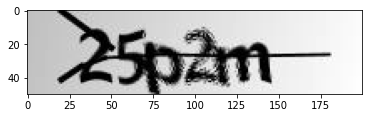

time: 185 ms


In [ ]:
# Dados de entrada estão disponíveis no caminho indicado pela variável path
path = '/content/drive/My Drive/Colab Notebooks/Pós-Graduação - IA/samples/samples/' # Defina o caminho dos dados aqui

print(os.listdir(path))
print('count:', len(os.listdir(path)))

# Exemplo de imagem do dataset
first_image = os.listdir(path)[0]
img=cv2.imread(path + first_image, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

## 4. Declaração de valores

In [ ]:
# Init main values
symbols = string.ascii_lowercase + "0123456789" # Todos os símbolos que um captcha pode conter
print(symbols)

num_symbols = len(symbols) # Quantidade de símbolos
print(num_symbols)  

img_shape = (50, 200, 1)

abcdefghijklmnopqrstuvwxyz0123456789
36
time: 3.97 ms


## 5. Pré-processamento dos dados

In [ ]:
def preprocess_data(path):
    n_samples = len(os.listdir(path)) # Número de amostras
    print('n_samples: ', n_samples)

    X = np.zeros((n_samples, 50, 200, 1)) # 1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) # 5*1070*36

    for i, pic in enumerate(os.listdir(path)):
        
        # Exibe progresso do processamento
        if i % 50 == 0: 
            print('Progress ', str(i) + '/' + str(n_samples))

        # Lê a imagem e converte para escalas de cinza (grayscale)
        img = cv2.imread(os.path.join(path, pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        if len(pic_target) < 6:
            
            # Faz scale e reshape na imagem
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            
            # Define targets and code them using OneHotEncoding
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
            
            X[i] = img
            y[:, i] = targs
    
    # Return final data
    return X, y

X, y = preprocess_data(path)

n_samples:  1071
Progress  0/1071
Progress  50/1071
Progress  100/1071
Progress  150/1071
Progress  200/1071
Progress  250/1071
Progress  300/1071
Progress  350/1071
Progress  400/1071
Progress  450/1071
Progress  500/1071
Progress  550/1071
Progress  600/1071
Progress  650/1071
Progress  700/1071
Progress  750/1071
Progress  800/1071
Progress  850/1071
Progress  900/1071
Progress  950/1071
Progress  1000/1071
Progress  1050/1071
time: 3.2 s


## 6. Definição de conjuntos de treinamento e teste

In [ ]:
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

time: 2.27 ms


In [ ]:
print('Treinamento:', len(X_train))
print('Teste:', len(X_test))

Treinamento: 970
Teste: 101
time: 1.96 ms


## 7. Criação do Modelo

In [ ]:
def create_model():
    img = layers.Input(shape=img_shape) # A entrada é uma imagem. Processamento ocorre em etapas de convolução
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Transforma o resultado da etapa anterior em um vetor flatten
    # Faz 5 branches para cada branch predizer uma letra
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compila o modelo e o retorna
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

time: 19.7 ms


In [ ]:
model = create_model()
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 50, 200, 16)  160         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_6[0][0]            
_______________________________________________________________________________________

## 8. Treinamento do modelo

In [ ]:
# Definidos 30 ciclos de treinamento
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 7s 275ms/step - loss: 17.2272 - dense_21_loss: 3.4435 - dense_23_loss: 3.4818 - dense_25_loss: 3.4221 - dense_27_loss: 3.4367 - dense_29_loss: 3.4432 - dense_21_accuracy: 0.0747 - dense_23_accuracy: 0.0606 - dense_25_accuracy: 0.0541 - dense_27_accuracy: 0.0515 - dense_29_accuracy: 0.0528 - val_loss: 17.5346 - val_dense_21_loss: 3.6201 - val_dense_23_loss: 3.5057 - val_dense_25_loss: 3.4806 - val_dense_27_loss: 3.4418 - val_dense_29_loss: 3.4864 - val_dense_21_accuracy: 0.0361 - val_dense_23_accuracy: 0.0464 - val_dense_25_accuracy: 0.0361 - val_dense_27_accuracy: 0.0567 - val_dense_29_accuracy: 0.0619
Epoch 2/30
25/25 [==============================] - 7s 262ms/step - loss: 15.8840 - dense_21_loss: 3.1373 - dense_23_loss: 3.1749 - dense_25_loss: 3.1956 - dense_27_loss: 3.1722 - dense_29_loss: 3.2040 - dense_21_accuracy: 0.0657 - dense_23_accuracy: 0.0735 - dense_25_accuracy: 0.0747 - dense_27_accuracy: 0.0503 - dense_29_accuracy: 0.0

## 9. Avaliação do Modelo

In [ ]:
score = model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]], verbose=1)
print('Testa pontuação e acurácia:', score)

4/4 [==============================] - 0s 42ms/step - loss: 18.7118 - dense_21_loss: 14.4543 - dense_23_loss: 1.2260 - dense_25_loss: 1.4873 - dense_27_loss: 0.8881 - dense_29_loss: 0.6562 - dense_21_accuracy: 0.0000e+00 - dense_23_accuracy: 0.7822 - dense_25_accuracy: 0.7030 - dense_27_accuracy: 0.7327 - dense_29_accuracy: 0.8416
Test Loss and accuracy: [18.711807250976562, 14.454259872436523, 1.2260003089904785, 1.4873274564743042, 0.8880635499954224, 0.6561548709869385, 0.0, 0.7821782231330872, 0.7029703259468079, 0.7326732873916626, 0.8415841460227966]
time: 302 ms


## 10. Realizando predição de códigos captcha específicos



In [ ]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt #, sum(probs) / 5

time: 7.33 ms


### 10.1. Predizendo código do captcha '8n5p3.png'

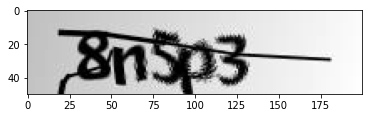

time: 167 ms


In [ ]:
# Imprime imagem
img=cv2.imread(path + 'imagem_objetivo.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
# Realização predição
print("Captcha =", predict(path + 'imagem_objetivo.png'))

Captcha = 8n5p3
time: 61.4 ms


# Conclusões

* Com 30 ciclos de treinamento foi possível observar que a taxa de perdas caiu consideravelmente
* Com a função de predição foi possível identificar o código do captcha solicitado pelo professor (item 10.1.).
* A acurácia do modelo atingiu 0.8415841460227966 na etapa de avaliação.

# Converter para HTML

* Fazer copia do notebook e colar na pasta raiz do Google colab
* Depois, executar comando abaixo:

In [ ]:
!jupyter nbconvert --to html sample_data/captcha-recognition.ipynb

[NbConvertApp] Converting notebook sample_data/captcha-recognition.ipynb to html
[NbConvertApp] Writing 427355 bytes to sample_data/captcha-recognition.html
time: 1.14 s
